# Titanic Data Exploration

Pratool Gadtaula

In [18]:
%matplotlib inline

import pandas

df = pandas.read_csv('train.csv')

In [19]:
for el in df.columns:
    print el

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [20]:
import thinkplot
import thinkstats2

male_survival = df['Survived'][ df['Sex'] == 'male'].mean()
female_survival = df['Survived'][ df['Sex'] == 'female' ].mean()

print 'Females had a survival rate of %.3f and %.3f of males survived' %(female_survival, male_survival)

Females had a survival rate of 0.742 and 0.189 of males survived


There is a pronounced difference between the male and female survival rate!

In [21]:
print 'Mean age: %.1f years' %df['Age'].mean()
print 'Standard deviation of age: %.2f years' %df['Age'].std()
print 'Young age threshold: %.1f years' %(df['Age'].mean() - df['Age'].std())

Mean age: 29.7 years
Standard deviation of age: 14.53 years
Young age threshold: 15.2 years


I'm going to attempt to figure out the rate of surivival for the young, where a young person is more than 1 standard deviation younger than the mean of the ages. From the Titanic's passengers, that would be an age of 15.2 years.

In [22]:
young = df['Age'].mean() - df['Age'].std()

young_survival = df['Survived'][ df['Age'] < young ].mean()
others_survival = df['Survived'][ df['Age'] >= young].mean()

print 'Youth survival: %.2f' %young_survival
print 'Others survival: %.2f' %others_survival

Youth survival: 0.59
Others survival: 0.38


As I expected, there is a large difference between the youth's survival rate and everyone else's survival rate. Although, this difference is not as large as that between males and females.

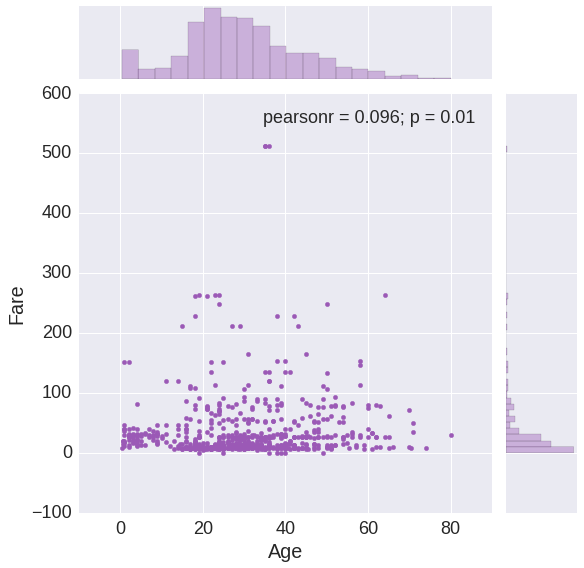

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(sum(map(ord, "palettes")))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)
#plt.figure(figsize=(1,1))
with sns.plotting_context("notebook", font_scale=1.8):
    sns.jointplot(x="Age", y="Fare", data=df, size=8);